## K-means算法

1. 从D中随机选择k个样本作为初始均值向量
2. repeat
   1. 令 C_i = 0
   2. for j=1,2,...m
       计算 $d_{ji}$ = ${||x_j-\mu_i||}_2$
       
       选择最近的均值向量$x_j$,放入C_i
   3. 计算新的均值向量
       $\hat{\mu} = \frac{1}{|C_i|}\sum{x}$
       
       更新当前均值向量
   4. 结束

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict #当dict没有是 默认初始化为 某种形式

%matplotlib inline

In [3]:
watermelon = np.array([[ 0.697  ,0.46 ],
                         [ 0.774  ,0.376],
                         [ 0.634  ,0.264],
                         [ 0.608  ,0.318],
                         [ 0.556  ,0.215],
                         [ 0.403  ,0.237],
                         [ 0.481  ,0.149],
                         [ 0.437  ,0.211],
                         [ 0.666  ,0.091],
                         [ 0.243  ,0.267],
                         [ 0.245  ,0.057],
                         [ 0.343  ,0.099],
                         [ 0.639  ,0.161],
                         [ 0.657  ,0.198],
                         [ 0.36   ,0.37 ],
                         [ 0.593  ,0.042],
                         [ 0.719  ,0.103],
                         [ 0.359  ,0.188],
                         [ 0.339  ,0.241],
                         [ 0.282  ,0.257],
                         [ 0.748  ,0.232],
                         [ 0.714  ,0.346],
                         [ 0.483  ,0.312],
                         [ 0.478  ,0.437],
                         [ 0.525  ,0.369],
                         [ 0.751  ,0.489],
                         [ 0.532  ,0.472],
                         [ 0.473  ,0.376],
                         [ 0.725  ,0.445],
                         [ 0.446  ,0.459]])

In [77]:
# 计算欧几里得距离
import math
def euclidean_distance(x1, x2):
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)

In [78]:
# 计算欧几里得距离
import math
def distance(x1, x2):
    distance = 0
    # Squared distance between each coordinate
    for i in range(len(x1)):
        for j in range(len(x1[i])):
            distance += pow((x1[i][j] - x2[i][j]), 2)
    return math.sqrt(distance)

In [82]:
def kmeans(data, k=3):
    m = data.shape[0]
    index = random.sample(range(m),k)
    mu = data[index] # 随机选择初始均值向量
    
    
    while True:
        C = defaultdict(list)
        
        for j in range(0, m):
            dij = [euclidean_distance(data[j],mu[i]) for i in range(k)]
            lambda_j = np.argmin(dij)   #选择最小的值得下标
    
    
            C[lambda_j].append(data[j].tolist())
        
        new_mu = [np.mean(C[i],axis=0).tolist() for i in range(k)]
             
        if distance(np.array(new_mu),np.array(mu))> 1e-9:
            mu = new_mu
        else:
            break
    return C,mu

In [83]:
k = 2
res,mu = kmeans(watermelon,k) 

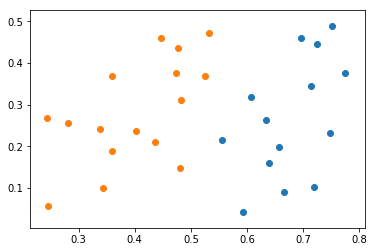

In [84]:
for i in range(k):
    res_i = np.array(res[i])
    plt.scatter(res_i[:,0],res_i[:,1])
plt.show()